<a href="https://colab.research.google.com/github/rheazh/Data-Analysis/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

You'd use a polynomial in a model when the data follows a curved pattern, not just a straight line. Polynomials help your model capture more complex trends in the data, making it more accurate for those kinds of relationships.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Including a polynomial might lead to overfitting. It can also cause instability, making the model behave strangely, especially with higher-degree polynomials. Plus, it can make the model harder to understand and slower to compute.

**Task3**:

What's the point of using b splines?

B-splines are used to fit smooth curves to data without making the model too complicated. They break the curve into small sections that are easier to control and make sure the curve is smooth at the connections between sections. This helps avoid problems with overfitting and makes the model more flexible.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a way to make predictions that also just gives you a idea or sense of how uncertain those predictions are. Instead of just predicting one value, it looks at all possible values that fit the data.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [5]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-i7b3gaeb
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-i7b3gaeb
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


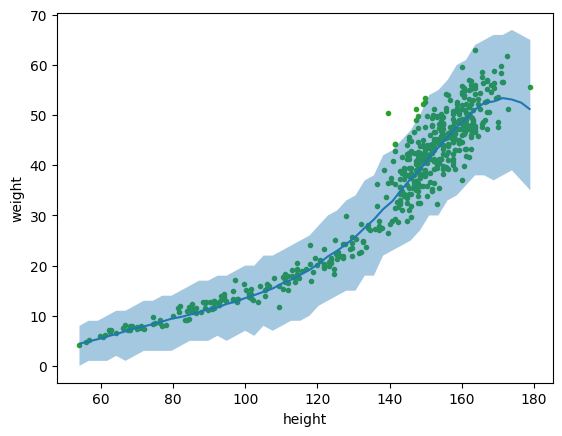

In [10]:
import pandas as pd
import bambi as bmb
import matplotlib.pyplot as plt

# Load the Howell dataset
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

# Define a polynomial model
model_poly = bmb.Model("weight ~ poly(height, 4)", howell, family="negativebinomial")

# Fit the model
idata_poly = model_poly.fit()

# Plot posterior predictions (PPC)
bmb.interpret.plot_predictions(model_poly, idata_poly, "height", pps=True)

# Overlay the original data points (height vs weight)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)
plt.show()


**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

From reading the article, I learned that Gaussian Processes can handle uncertainty in both the data and input locations. For instance, when combining the Mauna Loa CO₂ data with Antarctic ice core data, the dates of the ice core measurements are uncertain. The GP model accounts for this uncertainty by using prior information about measurement locations, which helps in accurately modeling complex data.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

I think the colorgraph might be my favorite because it seems like it would make data easier to understand and looks really nice. The colors help me quickly spot patterns and changes, making it more fun and clear to read. It’s both helpful for analyzing and pleasing to look at.